Pharmaceutical Drug Recognition
Identify the Pharmaceutical Drug used from the given image
https://www.kaggle.com/datasets/gauravduttakiit/pharmaceutical-drug-recognition/data



s

## ÎùºÏù¥Î∏åÎü¨Î¶¨ ÏûÑÌè¨Ìä∏

In [ ]:
import os
import shutil
import pandas as pd
import numpy as np

# openCV Ïù¥ÎØ∏ÏßÄ Î∂àÎü¨Ïò§Í≥† ÌÅ¨Í∏∞ Ï°∞Ï†à , Ïù¥ÎØ∏ÏßÄ Ï≤òÎ¶¨
import cv2
import tensorflow as tf
from kaggle.api.kaggle_api_extended import KaggleApi
from zipfile import ZipFile

# Î†àÏù¥Î∏î Ïù∏ÏΩîÎî© Î∞è Îç∞Ïù¥ÌÑ∞ Î∂ÑÌï†Í≥º Í∞ôÏùÄ Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨Î•º Ï≤òÎ¶¨ ÎùºÏù¥Î∏åÎü¨Î¶¨
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Îî•Îü¨Îãù Î™®Îç∏ ÎßåÎì§Í≥† ÌïôÏäµ ÎùºÏù¥Î∏åÎü¨Î¶¨
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical

print("‚úÖ ÎùºÏù¥Î∏åÎü¨Î¶¨ ÏûÑÌè¨Ìä∏ ÏôÑÎ£å!")

‚úÖ ÎùºÏù¥Î∏åÎü¨Î¶¨ ÏûÑÌè¨Ìä∏ ÏôÑÎ£å!


## Îç∞Ïù¥ÌÑ∞ÏÖã Ï§ÄÎπÑ (Dataset Preparation)

In [ ]:
# Kaggle API ÏÑ§Ï†ï
kaggle_api = KaggleApi()
kaggle_api.authenticate()

# Îç∞Ïù¥ÌÑ∞ÏÖã Îã§Ïö¥Î°úÎìú Í≤ΩÎ°ú Î∞è ÌååÏùº Ïù¥Î¶Ñ ÏÑ§Ï†ï
dataset_name = 'gauravduttakiit/pharmaceutical-drug-recognition'
download_path = '.'
zip_file_name = 'pharmaceutical-drug-recognition.zip'

print("Îç∞Ïù¥ÌÑ∞ÏÖã Îã§Ïö¥Î°úÎìúÎ•º ÏãúÏûëÌï©ÎãàÎã§...")
# Îç∞Ïù¥ÌÑ∞ÏÖã Îã§Ïö¥Î°úÎìú
kaggle_api.dataset_download_files(dataset_name, path=download_path, quiet=False)

# ÏïïÏ∂ï Ìï¥Ï†ú
print(f"'{zip_file_name}' ÌååÏùº ÏïïÏ∂ï Ìï¥Ï†úÎ•º ÏãúÏûëÌï©ÎãàÎã§...")
with ZipFile(zip_file_name, 'r') as zip_ref:
    zip_ref.extractall(download_path)

# Î∂àÌïÑÏöîÌïú zip ÌååÏùº ÏÇ≠Ï†ú
os.remove(zip_file_name)

print("‚úÖ Îç∞Ïù¥ÌÑ∞ÏÖã Ï§ÄÎπÑ ÏôÑÎ£å!")
 # train, test Ìè¥ÎçîÍ∞Ä ÏûàÎäîÏßÄ ÌôïÏù∏
!dir

Îç∞Ïù¥ÌÑ∞ÏÖã Îã§Ïö¥Î°úÎìúÎ•º ÏãúÏûëÌï©ÎãàÎã§...
Dataset URL: https://www.kaggle.com/datasets/gauravduttakiit/pharmaceutical-drug-recognition


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 200M/200M [00:00<00:00, 1.78GB/s]


'pharmaceutical-drug-recognition.zip' ÌååÏùº ÏïïÏ∂ï Ìï¥Ï†úÎ•º ÏãúÏûëÌï©ÎãàÎã§...


‚úÖ Îç∞Ïù¥ÌÑ∞ÏÖã Ï§ÄÎπÑ ÏôÑÎ£å!
 C ÎìúÎùºÏù¥Î∏åÏùò Î≥ºÎ•®ÏóêÎäî Ïù¥Î¶ÑÏù¥ ÏóÜÏäµÎãàÎã§.
 Î≥ºÎ•® ÏùºÎ†® Î≤àÌò∏: 181E-E7B6

 C:\Users\dudgh ÎîîÎ†âÌÑ∞Î¶¨

2025-08-13  Ïò§ÌõÑ 04:21    <DIR>          .
2025-01-20  Ïò§Ï†Ñ 01:53    <DIR>          ..
2025-07-16  Ïò§ÌõÑ 05:54         5,877,368 $race_car_track_x264.mp4
2025-07-09  Ïò§ÌõÑ 09:26             3,426 .bash_history
2024-11-07  Ïò§ÌõÑ 02:11    <DIR>          .bundle
2025-07-17  Ïò§ÌõÑ 09:17    <DIR>          .cache
2024-01-09  Ïò§Ï†Ñ 12:00    <DIR>          .conda
2024-01-08  Ïò§ÌõÑ 11:59                68 .condarc
2025-05-15  Ïò§ÌõÑ 10:44    <DIR>          .cursor
2025-05-20  Ïò§ÌõÑ 10:05    <DIR>          .docker
2025-06-11  Ïò§Ï†Ñ 10:55    <DIR>          .dotnet
2025-05-20  Ïò§ÌõÑ 10:01                64 .gitconfig
2025-08-13  Ïò§ÌõÑ 03:51    <DIR>          .ipynb_checkpoints
2024-01-09  Ïò§ÌõÑ 10:52    <DIR>          .ipython
2024-01-09  Ïò§ÌõÑ 10:59    <DIR>          .jupyter
2025-08-13  Ïò§ÌõÑ 04:00    <DIR>          .kaggle
2024-

## Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨ Î∞è Î∂ÑÌï† (Data Preprocessing and Splitting)

In [ ]:
# --- ÏÉÅÏàò Î∞è Í≤ΩÎ°ú ÏÑ§Ï†ï ---
DATA_DIR = 'train'
CSV_FILE = 'Training_set.csv'
IMG_SIZE = 128

# --- CSV ÌååÏùº Î°úÎìú ---
print(f"'{CSV_FILE}' ÌååÏùºÏùÑ Î°úÎìúÌï©ÎãàÎã§.")
df = pd.read_csv(CSV_FILE)

# --- Ïù¥ÎØ∏ÏßÄ Í≤ΩÎ°ú ÏÉùÏÑ± ---
# Í∞Å Ïù¥ÎØ∏ÏßÄÏùò Ï†ÑÏ≤¥ Í≤ΩÎ°úÎ•º Îã¥ÏùÑ ÏÉàÎ°úÏö¥ Ïó¥(column)ÏùÑ ÏÉùÏÑ±Ìï©ÎãàÎã§.
df['image_path'] = df['filename'].apply(lambda f: os.path.join(DATA_DIR, f))

# --- Ïù¥ÎØ∏ÏßÄ Î∞è Î†àÏù¥Î∏î Î°úÎìú ---
images = []
labels = []

print("Ïù¥ÎØ∏ÏßÄ ÌååÏùºÏùÑ Î°úÎî©ÌïòÍ≥† Î¶¨ÏÇ¨Ïù¥Ï¶àÌï©ÎãàÎã§...")
for index, row in df.iterrows():
    image_path = row['image_path']
    label = row['label']

    try:
        img_array = cv2.imread(image_path)
        if img_array is not None:
            img_resized = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
            images.append(img_resized)
            labels.append(label)
        else:
            print(f"Í≤ΩÍ≥†: Ïù¥ÎØ∏ÏßÄÎ•º Î°úÎìúÌï† Ïàò ÏóÜÏäµÎãàÎã§ - {image_path}")
    except Exception as e:
        print(f"Ïò§Î•ò Î∞úÏÉù: {e}, ÌååÏùº: {image_path}")

# NumPy Î∞∞Ïó¥Î°ú Î≥ÄÌôò
images = np.array(images)
labels = np.array(labels)

# Ïù¥ÎØ∏ÏßÄ Îç∞Ïù¥ÌÑ∞ Ï†ïÍ∑úÌôî (0~1 ÏÇ¨Ïù¥ Í∞íÏúºÎ°ú)
# Ïù¥ÎØ∏ÏßÄÏùò Í∞Å ÌîΩÏÖÄ Í∞íÏùÑ 0~255 Î≤îÏúÑÏóêÏÑú 0~1 ÏÇ¨Ïù¥Ïùò Í∞íÏúºÎ°ú Î≥ÄÌôò Ìï©ÎãàÎã§.
images = images / 255.0

print(f"‚úÖ Ï¥ù {len(images)}Í∞úÏùò Ïù¥ÎØ∏ÏßÄÎ•º ÏÑ±Í≥µÏ†ÅÏúºÎ°ú Î∂àÎü¨ÏôîÏäµÎãàÎã§.")

'Training_set.csv' ÌååÏùºÏùÑ Î°úÎìúÌï©ÎãàÎã§.
Ïù¥ÎØ∏ÏßÄ ÌååÏùºÏùÑ Î°úÎî©ÌïòÍ≥† Î¶¨ÏÇ¨Ïù¥Ï¶àÌï©ÎãàÎã§...
‚úÖ Ï¥ù 7000Í∞úÏùò Ïù¥ÎØ∏ÏßÄÎ•º ÏÑ±Í≥µÏ†ÅÏúºÎ°ú Î∂àÎü¨ÏôîÏäµÎãàÎã§.


In [ ]:
# --- Î†àÏù¥Î∏î Ïù∏ÏΩîÎî© ---
# 1. LabelEncoderÎ•º ÏÇ¨Ïö©Ìï¥ Î¨∏ÏûêÏó¥ Î†àÏù¥Î∏îÏùÑ Ïà´Ïûê(0, 1, 2...)Î°ú Î≥ÄÌôò
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)

# 2. ÌÅ¥ÎûòÏä§ Í∞úÏàò ÌôïÏù∏
num_classes = len(label_encoder.classes_)
print(f"Ï¥ù ÌÅ¥ÎûòÏä§ Í∞úÏàò: {num_classes}")

# 3. to_categoricalÏùÑ ÏÇ¨Ïö©Ìï¥ Ïõê-Ìï´(One-Hot) Î≤°ÌÑ∞Î°ú Î≥ÄÌôò
# Î≥ÄÌôòÎêú Ïà´Ïûê Î†àÏù¥Î∏îÏùÑ `to_coategorical()` ÏÇ¨Ïö©Ìï¥ Ïõê-Ìï´ Î≤°ÌÑ∞ ÌòïÌÉúÎ°ú ÎßåÎì†Îã§.
# Îã§Ï§ë Î∂ÑÎ•ò Î™®Îç∏Ïùò Ï†ïÎãµ ÌòïÏãùÏúºÎ°ú Ï†ÅÌï©
labels_categorical = to_categorical(labels_encoded, num_classes=num_classes)


# --- Îç∞Ïù¥ÌÑ∞ Î∂ÑÌï† ---
# ÌõàÎ†®(80%), Í≤ÄÏ¶ù(10%), ÌÖåÏä§Ìä∏(10%) ÏÑ∏Ìä∏Î°ú Î∂ÑÌï†
X_train, X_rem, y_train, y_rem = train_test_split(images, labels_categorical, train_size=0.8, random_state=42, stratify=labels_categorical)
X_val, X_test, y_val, y_test = train_test_split(X_rem, y_rem, test_size=0.5, random_state=42, stratify=y_rem)

print("\n‚úÖ Îç∞Ïù¥ÌÑ∞ Î∂ÑÌï† ÏôÑÎ£å!")
print(f"ÌõàÎ†® Îç∞Ïù¥ÌÑ∞ ÌòïÌÉú: {X_train.shape}, {y_train.shape}")
print(f"Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞ ÌòïÌÉú: {X_val.shape}, {y_val.shape}")
print(f"ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ ÌòïÌÉú: {X_test.shape}, {y_test.shape}")

Ï¥ù ÌÅ¥ÎûòÏä§ Í∞úÏàò: 10

‚úÖ Îç∞Ïù¥ÌÑ∞ Î∂ÑÌï† ÏôÑÎ£å!
ÌõàÎ†® Îç∞Ïù¥ÌÑ∞ ÌòïÌÉú: (5600, 128, 128, 3), (5600, 10)
Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞ ÌòïÌÉú: (700, 128, 128, 3), (700, 10)
ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ ÌòïÌÉú: (700, 128, 128, 3), (700, 10)


## CNN Î™®Îç∏ ÏÑ§Í≥Ñ Î∞è ÌïôÏäµ (CNN Model Design and Trainging)

In [ ]:
# --- Î™®Îç∏ ÏÑ§Í≥Ñ ---
model = Sequential([
    # ÌäπÏßï Ï∂îÏ∂úÎ∂Ä (Convolutional Base)
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    MaxPooling2D((2, 2)),
    
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    # Î∂ÑÎ•òÎ∂Ä (Classifier)
    Flatten(),
    Dense(512, activation='relu'),
    # Î™®Îç∏Ïùò ÏùºÎ∞òÌôî ÏÑ±Îä•ÏùÑ ÎÜíÏù¥Í∏∞ ÏúÑÌï¥
    Dropout(0.5), # Í≥ºÏ†ÅÌï© Î∞©ÏßÄÎ•º ÏúÑÌïú Dropout
    Dense(num_classes, activation='softmax') # ÌÅ¥ÎûòÏä§ Í∞úÏàòÏóê ÎßûÏ∂ò Ï∂úÎ†•Ï∏µ
])

# --- Î™®Îç∏ Ïª¥ÌååÏùº ---
model.compile(optimizer='adam',
              loss='categorical_crossentropy', # Îã§Ï§ë Î∂ÑÎ•ò Î¨∏Ï†úÏù¥ÎØÄÎ°ú categorical_crossentropy ÏÇ¨Ïö©
              metrics=['accuracy'])

model.summary()


# --- Î™®Îç∏ ÌïôÏäµ ---
print("\nÎ™®Îç∏ ÌïôÏäµÏùÑ ÏãúÏûëÌï©ÎãàÎã§...")
history = model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=32,
    validation_data=(X_val, y_val)
)

print("\n‚úÖ Î™®Îç∏ ÌïôÏäµ ÏôÑÎ£å!")

C:\Users\dudgh\miniconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

‚îè‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îì
‚îÉ Layer (type)                         ‚îÉ Output Shape                ‚îÉ         Param # ‚îÉ
‚î°‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î©
‚îÇ conv2d (Conv2D)                      ‚îÇ (None, 126, 126, 32)        ‚îÇ             896 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ max_pooling2d (MaxPooling2D)         ‚îÇ (None, 63, 63, 32)          ‚îÇ               0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ conv2d_1 (Conv2D)                    ‚îÇ (None, 61, 61, 64)          ‚îÇ          18,496 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ max_pooling2d_1 (MaxPooling2D)       ‚îÇ (None, 30, 30, 64)          ‚îÇ               0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ conv2d_2 (Conv2D)                    ‚îÇ (None, 28, 28, 128)         ‚îÇ          73,856 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ max_pooling2d_2 (MaxPooling2D)       ‚îÇ (None, 14, 14, 128)         ‚îÇ               0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ flatten (Flatten)                    ‚îÇ (None, 25088)               ‚îÇ               0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense (Dense)                        ‚îÇ (None, 512)                 ‚îÇ      12,845,568 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dropout (Dropout)                    ‚îÇ (None, 512)                 ‚îÇ               0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense_1 (Dense)                      ‚îÇ (None, 10)                  ‚îÇ           5,130 ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ

 Total params: 12,943,946 (49.38 MB)

 Trainable params: 12,943,946 (49.38 MB)

 Non-trainable params: 0 (0.00 B)


Î™®Îç∏ ÌïôÏäµÏùÑ ÏãúÏûëÌï©ÎãàÎã§...
Epoch 1/20
175/175 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 18s 98ms/step - accuracy: 0.1313 - loss: 2.3044 - val_accuracy: 0.2371 - val_loss: 2.0514
Epoch 2/20
175/175 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 17s 98ms/step - accuracy: 0.2394 - loss: 1.9951 - val_accuracy: 0.3843 - val_loss: 1.6506
Epoch 3/20
175/175 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 17s 96ms/step - accuracy: 0.4569 - loss: 1.4948 - val_accuracy: 0.5986 - val_loss: 1.1762
Epoch 4/20
175/175 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 17s 97ms/step - accuracy: 0.6498 - loss: 1.0262 - val_accuracy: 0.7214 - val_loss: 0.8687
Epoch 5/20
175/175 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 17s 97ms/step - accuracy: 0.7794 - loss: 0.6568 - val_accuracy: 0.6943 - val_loss: 0.8558
Epoch 6/20
175/175 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 17s 96ms/step - accuracy: 0.8669 

## Î™®Îç∏ ÏÑ±Îä• ÌèâÍ∞Ä (Model Performance Evaluation)

In [ ]:
print("\nÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞Î°ú Î™®Îç∏ ÏÑ±Îä•ÏùÑ ÌèâÍ∞ÄÌï©ÎãàÎã§...")

# `model.evaluate()`Ìï®ÏàòÎ•º ÏÇ¨Ïö©ÌïòÏó¨ Ìïú Î≤àÎèÑ ÌïôÏäµÏóê ÏÇ¨Ïö©ÎêòÏßÄ ÏïäÏùÄ ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞Ïóê ÎåÄÌïú ÏÜêÏã§Í≥º, Ï†ïÌôïÎèÑÎ•º Í≥ÑÏÇ∞
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=2)

print(f"\nÌÖåÏä§Ìä∏ ÏÜêÏã§ (Loss): {test_loss:.4f}")
print(f"ÌÖåÏä§Ìä∏ Ï†ïÌôïÎèÑ (Accuracy): {test_accuracy:.4f}")


ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞Î°ú Î™®Îç∏ ÏÑ±Îä•ÏùÑ ÌèâÍ∞ÄÌï©ÎãàÎã§...
22/22 - 0s - 20ms/step - accuracy: 0.8629 - loss: 0.8401

ÌÖåÏä§Ìä∏ ÏÜêÏã§ (Loss): 0.8401
ÌÖåÏä§Ìä∏ Ï†ïÌôïÎèÑ (Accuracy): 0.8629


## Í∞úÎ≥Ñ Ïù¥ÏßÄÎØ∏ ÏòàÏ∏° Î∞è Í≤∞Í≥º ÌôïÏù∏(Individual Image Prediction and Result Verification)

1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 14ms/step


C:\Users\dudgh\miniconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51221 (\N{HANGUL SYLLABLE JEONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\dudgh\miniconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 45813 (\N{HANGUL SYLLABLE DAB}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\dudgh\miniconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 50696 (\N{HANGUL SYLLABLE YE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\dudgh\miniconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 52769 (\N{HANGUL SYLLABLE CEUG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


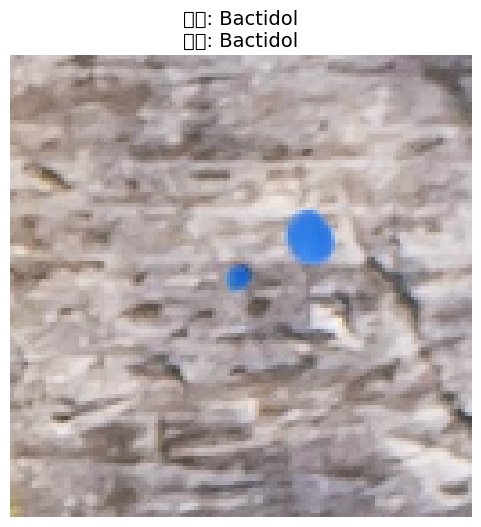

‚úÖ Ï†ïÎãµ ÏïΩ Ïù¥Î¶Ñ: Bactidol
‚úÖ Î™®Îç∏Ïùò ÏòàÏ∏°: Bactidol

Ï†ïÌôïÌïòÍ≤å ÏòàÏ∏°ÌñàÏäµÎãàÎã§! üéâ


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# ÌÖåÏä§Ìä∏Ìï† Ïù¥ÎØ∏ÏßÄ ÏÑ†ÌÉù (0Î∂ÄÌÑ∞ 699 ÏÇ¨Ïù¥Ïùò Ïà´ÏûêÎ•º Î∞îÍøîÎ≥¥ÏÑ∏Ïöî)
image_index = 55 

# ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ÏÖãÏóêÏÑú Ïù¥ÎØ∏ÏßÄÏôÄ Ï†ïÎãµ Î†àÏù¥Î∏î Í∞ÄÏ†∏Ïò§Í∏∞
test_image = X_test[image_index]
true_label_one_hot = y_test[image_index]

# Ïõê-Ìï´ Ïù∏ÏΩîÎî©Îêú Ï†ïÎãµ Î†àÏù¥Î∏îÏùÑ Îã§Ïãú ÏïΩ Ïù¥Î¶ÑÏúºÎ°ú Î≥ÄÌôò
true_label_index = np.argmax(true_label_one_hot)
true_label_name = label_encoder.inverse_transform([true_label_index])[0]

# Î™®Îç∏ ÏòàÏ∏°ÏùÑ ÏúÑÌï¥ Ïù¥ÎØ∏ÏßÄ ÌòïÌÉú Î≥ÄÍ≤Ω (1, 128, 128, 3)
image_for_prediction = np.expand_dims(test_image, axis=0)

# Î™®Îç∏ÏùÑ ÏÇ¨Ïö©Ìï¥ ÏòàÏ∏° ÏàòÌñâ
prediction_probabilities = model.predict(image_for_prediction)
predicted_index = np.argmax(prediction_probabilities)

# ÏòàÏ∏°Îêú Ïù∏Îç±Ïä§Î•º ÏïΩ Ïù¥Î¶ÑÏúºÎ°ú Î≥ÄÌôò
predicted_label_name = label_encoder.inverse_transform([predicted_index])[0]

# --- Í≤∞Í≥º ÏãúÍ∞ÅÌôî ---
plt.figure(figsize=(6, 6))
plt.imshow(test_image)
plt.title(f"Ï†ïÎãµ: {true_label_name}\nÏòàÏ∏°: {predicted_label_name}", fontsize=14)
plt.axis('off')
plt.show()

print(f"‚úÖ Ï†ïÎãµ ÏïΩ Ïù¥Î¶Ñ: {true_label_name}")
print(f"‚úÖ Î™®Îç∏Ïùò ÏòàÏ∏°: {predicted_label_name}")

if true_label_name == predicted_label_name:
    print("\nÏ†ïÌôïÌïòÍ≤å ÏòàÏ∏°ÌñàÏäµÎãàÎã§! üéâ")
else:
    print("\nÏòàÏ∏°Ïù¥ ÌãÄÎ†∏ÏäµÎãàÎã§. üò•")